<a href="https://colab.research.google.com/github/jjschueder/7331DataMiningNotebooks/blob/master/lab2/(exceptionalwork)Copy_of_Lab2_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Mining 7331 - Spring 2020**

## Lab 2 - Classification

#### Daniel Clark, Joe Schueder, Jeff Washburn, Armando Vela


### Introduction

The Iowa Liquor  Sales dataset is an API from Google’s Bigquery which contains the wholesale purchases by retail stores in the Iowa area. The dataset includes the spirit purchase details by product, date of purchase, and location the item was purchased from an Iowa Class “E” liquor license holder (retail stores). The time frame of this data starts from January 1, 2012 through December 31, 2019. As part of the study commissioned by the Iowa Department of Commerce, all alcoholic sales within the state were logged into the Department system, and in turn, published as open data by the State of Iowa. The dataset contains detail on the name, product, quantity and location of the individual container or package sale between the wholesaler (vendor) and the retailer.

### Data Description 

The initial data set was 4.63GB with 17.7 million rows. We subsetted that down to 400k rows using a random set of data from the 2019 sales data. This work was done in our initial processing from earlier.

So taking our initial processing that was done from previous work, we further refined the 400k dataset by one-hot encoding the categorical features for sales month, liquor categories, and the stores. The stores will not be used in this analysis; however, it was still one-hot encoded for future analysis

It's also worth noting, that we used the log transformed values for sales dollars, cost per liter, state bottle cost and volume sold in liters along with the liquor catogory to focus on our classification and ensure that outliers do not hold too heavy of a weight in our analysis. 


In [1]:
import pandas as pd

url_dataset = 'https://raw.githubusercontent.com/jjschueder/7331DataMiningNotebooks/master/Live%20Assignments/df1hotmerge2.csv'
data = pd.read_csv(url_dataset, nrows = 40000)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 68 columns):
Unnamed: 0                  40000 non-null int64
pack                        40000 non-null int64
bottle_volume_ml            40000 non-null int64
state_bottle_cost           40000 non-null float64
state_bottle_retail         40000 non-null float64
bottles_sold                40000 non-null int64
sale_dollars                40000 non-null float64
volume_sold_liters          40000 non-null float64
volume_sold_gallons         40000 non-null float64
counter                     40000 non-null int64
liquor_category             40000 non-null object
store_parent                40000 non-null object
month                       40000 non-null object
year                        40000 non-null int64
monthyear                   40000 non-null object
liquor_category_AMARETTO    40000 non-null int64
liquor_category_BRANDY      40000 non-null int64
liquor_category_GIN         40000 non-null i

Here you can see that we have 400,000 non null objects one-hot encoded to include month, year, store name and alcohol type. For our previous classification analysis, we dropped the liquor category and all the liquor types and just used the binary classification for Whiskey and Non-Whiskey. With 1 representing whether the liquor type was whiskey and 0 representing a non whiskey. 

### Project Requirements

####Data Preparation (15 points total)

• Define and prepare your class variables. Use proper variable
representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for
dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for
the analysis.

• Describe the final dataset that is used for classification/regression (include a
description of any newly formed variables you created)

####Modeling and Evaluation (70 points total)

• Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s)
appropriate for analyzing the results of your modeling? Give a detailed explanation
backing up any assertions.

• Choose the method you will use for dividing your data into training and
testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate.

• Create three different classification/regression models for each task  (e.g., random forest,
KNN, and SVM). Two modeling techniques must be new (but the third could be SVM or
logistic regression). Adjust parameters as appropriate to increase generalization
performance using your chosen metric.

• Analyze the results using your chosen method of evaluation. Use
visualizations of the results to bolster the analysis. Explain any visuals and analyze why
they are interesting to someone that might use this model.

• Discuss the advantages of each model for each classification task, if any. If
there are not advantages, explain why. Is any model better than another? Is the
difference significant with 95% confidence? Use proper statistical comparison methods.

• Which attributes from your analysis are most important? Use proper
methods discussed in class to evaluate the importance of different attributes. Discuss
the results and hypothesize about why certain attributes are more important than others
for a given classification task.


####Deployment 

• How useful is your model for interested parties (i.e., the companies or
organizations that might want to use it for prediction)? How would you measure the
model's value if it was used by these parties? How would your deploy your model for
interested parties? What other data should be collected? How often would the model
need to be updated, etc.? 


####Exceptional Work 
• You have free reign to provide additional modeling.

• One idea: grid search parameters in a parallelized fashion and visualize the
performances across attributes. Which parameters are most significant for making a
good model for each classification algorithm?

## Data Preparation Part 1
Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

We obtained a dataset on Iowa Liquor Sales from Google Bigquery. The aim of recording the data set is for the state to track alcohol and liquor sales from wholesalers and retailers from the year 2012 through 2019. You can see some Exploratory Data Analysis of this dataset below: 

https://github.com/jjschueder/7331DataMiningNotebooks/blob/master/lab1/msds7331_clark_schueder_vela_washburn.ipynb



In [2]:
# Import all necessary libraries we will be using in our dataset

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import sklearn
import statistics
import random

from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, RFE, SelectFromModel

from sklearn.preprocessing import StandardScaler, Binarizer

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, auc, roc_curve
from IPython.display import display, HTML

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit, StratifiedShuffleSplit

from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

matplotlib.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
print(data.shape)
data.head()


(40000, 68)


,Unnamed: 0,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,counter,liquor_category,store_parent,month,year,monthyear,liquor_category_AMARETTO,liquor_category_BRANDY,liquor_category_GIN,liquor_category_LIQUEUR,liquor_category_Other,liquor_category_RUM,liquor_category_SCHNAPPS,liquor_category_TEQUILA,liquor_category_VODKA,liquor_category_WHISKY,store_parent_CVS,store_parent_Caseys,store_parent_Hy-Vee,store_parent_Kum&Go,store_parent_Other,store_parent_QuikTrip,store_parent_SamsClub,store_parent_SmokingJoes,store_parent_Target,store_parent_Wal-Mart,store_parent_Walgreens,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,year_2019,monthyear_Apr-2019,monthyear_Aug-2019,monthyear_Dec-2019,monthyear_Feb-2019,monthyear_Jan-2019,monthyear_Jul-2019,monthyear_Jun-2019,monthyear_Mar-2019,monthyear_May-2019,monthyear_Nov-2019,monthyear_Oct-2019,monthyear_Sep-2019,sale_dollars_trans,cost_per_liter,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,grossmargin
0,0,20,375,3.85,5.78,20,115.60,7.50,1.98,1,Other,Other,Nov,2019,Nov-19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4.750136,15.413333,2.735233,1.348073,2.995732,2.014903,0.333910
1,1,8,50,8.75,13.13,1,13.13,0.05,0.01,1,Other,Other,Nov,2019,Nov-19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2.574900,262.600000,5.570632,2.169054,0.000000,-2.995732,0.333587
2,2,12,1000,16.50,24.75,6,148.50,6.00,1.58,1,GIN,Hy-Vee,May,2019,May-19,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,5.000585,24.750000,3.208825,2.803360,1.791759,1.791759,0.333333
3,3,6,750,21.17,31.76,24,762.24,18.00,4.75,1,WHISKY,Hy-Vee,Nov,2019,Nov-19,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6.636261,42.346667,3.745890,3.052585,3.178054,2.890372,0.333438
4,4,6,1750,9.31,13.97,12,167.64,21.00,5.54,1,Other,Hy-Vee,Nov,2019,Nov-19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5.121819,7.982857,2.077296,2.231089,2.484907,3.044522,0.333572


**Our data Preparation includes the folloiwng layout**

*   Since we are predicting our liquor category type (opening to the entire list of categories and not just one), we can assign them a numerical value.
* Create new variables using aggredate data on profit, total cost and revenue
*   Since we transformed a number of continuous variables, we can drop them so that we are working directly on our normalized data




In [3]:
# Since we are predicting our liquor category type (opening to the entire list of categories and not just one), we can assign them a numerical value.

print (data['liquor_category'].unique())

"""df = pd.DataFrame({'col_1':[133,255,36,477,55,63]})
d = {'1':'M', '2': 'C', '3':'a', '4':'f', '5':'r', '6':'s'}
def ifef(col):
    col = str(col)
    return d[col[0]]

df['id_label'] = df['col_1'].apply(ifef)
print(df)"""

d = {'O':'1', 'G': '2', 'W':'3', 'T':'4', 'L':'5', 'V':'6', 'R':'7', 'S': '8', 'A':'9', 'B':'10'}

#data['id_label'] = data['liquor_category'].apply(ifef)

data['id_label'] = data['liquor_category'].astype(str).str[0].map(d)

print(data.head())

['Other' 'GIN' 'WHISKY' 'TEQUILA' 'LIQUEUR' 'VODKA' 'RUM' 'SCHNAPPS'
 'AMARETTO' 'BRANDY']
   Unnamed: 0  pack  ...  grossmargin  id_label
0           0    20  ...     0.333910         1
1           1     8  ...     0.333587         1
2           2    12  ...     0.333333         2
3           3     6  ...     0.333438         3
4           4     6  ...     0.333572         1

[5 rows x 69 columns]


In [0]:
# Create new variables using aggredate data on profit, total cost and revenue

#do some calculations for cost and profit
data['profit'] = data['state_bottle_retail']*data['bottles_sold'] - data['state_bottle_cost']* data['bottles_sold']
data['profit_trans']= np.log(data['profit'])

data['totalcost'] = data['state_bottle_cost']* data['bottles_sold']
data['totalcost_trans']= np.log(data['totalcost'])

data['revenue'] = data['state_bottle_retail']*data['bottles_sold']
data['revenue_trans']= np.log(data['revenue'])

data['bottle_volume_ml_trans']= np.log(data['bottle_volume_ml'])

data['pack_trans']= np.log(data['pack'])

(40000, 12)


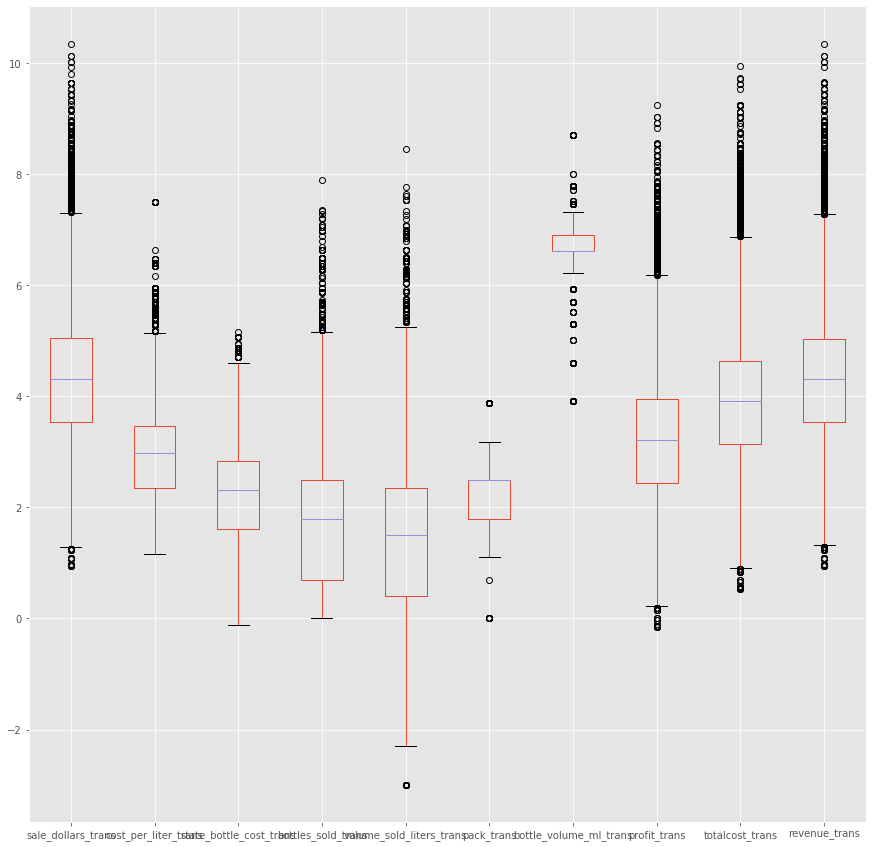

In [5]:
# Since we transformed a number of continuous variables, we can drop them so that we are working directly on our normalized data


# Remove unwanted columns, which include all the specific liquor categories, 
# except for liquor_category_WHISKY since that is what we want to classify on, along
# with all the store_ attributes
"""
cat_vars=['counter', 'liquor_category', 'store_parent',
 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 
 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 
 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 
 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 
 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 
 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
"""
#keep our transformed detail, along with the timing and store name detail

to_keep=['sale_dollars_trans', 'cost_per_liter_trans', 'store_parent',
      'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans','pack_trans', 'bottle_volume_ml_trans', 
       'profit_trans', 'totalcost_trans', 'revenue_trans', 'id_label']
data_final=data[to_keep]
data_final.columns.values

#boxplot of all the variables
plt.figure(figsize=(15, 15))
ax = data_final.boxplot()
#ax.set_yscale('log')

print(data_final.shape)


From the standpoint of the boxplots, we can see that we have some uniformity in our continuous features with minimal outliers. To help us accurately predict our liquor categires, this will be helpful in us using these features build versious models to compare performance. Running a quick shape feature, we can see that we are not missing any data.

In [6]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
sale_dollars_trans          40000 non-null float64
cost_per_liter_trans        40000 non-null float64
store_parent                40000 non-null object
state_bottle_cost_trans     40000 non-null float64
bottles_sold_trans          40000 non-null float64
volume_sold_liters_trans    40000 non-null float64
pack_trans                  40000 non-null float64
bottle_volume_ml_trans      40000 non-null float64
profit_trans                40000 non-null float64
totalcost_trans             40000 non-null float64
revenue_trans               40000 non-null float64
id_label                    40000 non-null object
dtypes: float64(10), object(2)
memory usage: 3.7+ MB


Running a quick df describe, we can se that almost all of our variables are floats to account for the transformations. With the id_label and store parent being an object features used as our classifiers we are looking to use in our datasets. The last feature pack is represented as an int, which makes sense because they are typically sold in packs of 6, 12, 24 and 48.

## Data Preparation Part 2

Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

In [7]:
data_final.describe()

,sale_dollars_trans,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,pack_trans,bottle_volume_ml_trans,profit_trans,totalcost_trans,revenue_trans
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,4.298454,2.971822,2.235238,1.657888,1.326632,2.334344,6.576622,3.200717,3.893126,4.298837
std,1.127726,0.865337,0.782898,1.106078,1.384640,0.525811,0.762413,1.127691,1.127849,1.127796
min,0.943906,1.163151,-0.116534,0.000000,-2.995732,0.000000,3.912023,-0.150823,0.536493,0.943906
25%,3.544432,2.345645,1.607436,0.693147,0.405465,1.791759,6.620073,2.446685,3.138966,3.544432
50%,4.319087,2.987700,2.306577,1.791759,1.504077,2.484907,6.620073,3.222071,3.912823,4.319087
75%,5.050625,3.465319,2.839078,2.484907,2.351375,2.484907,6.907755,3.943522,4.634341,5.040582
max,10.352874,7.495542,5.164729,7.901007,8.460623,3.871201,8.699515,9.254262,9.947409,10.352874


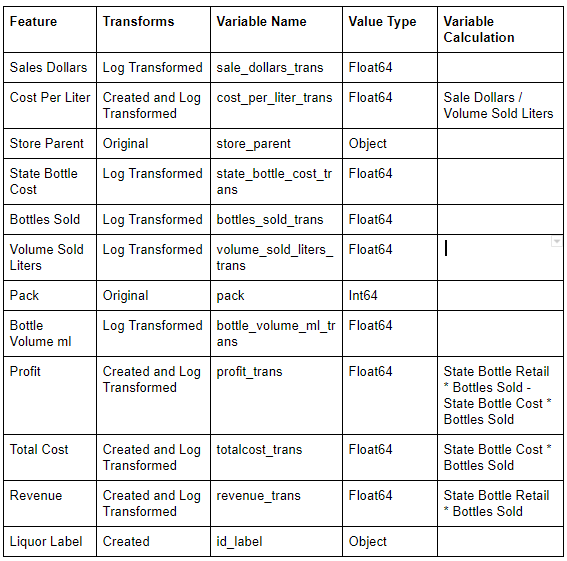


In [8]:
data_final.shape

(40000, 12)

Our final data set includes 12 features and 400,000 entries. 

In [9]:
(data_final['store_parent'].value_counts()/len(data_final))*100

Other          46.6750
Hy-Vee         39.0950
Wal-Mart        4.3475
Caseys          2.3775
SamsClub        1.9700
SmokingJoes     1.5275
Kum&Go          1.2725
QuikTrip        1.2575
Target          0.8375
Walgreens       0.4175
CVS             0.2225
Name: store_parent, dtype: float64

## Modeling and Evaluation 1

The purpose of this Model is to build a classifier of the alcohol category and detirmine the sales and item measures that play the most weight into predicting the correct alcohol category. 

An ROC curve, also known as a Reciever Operation Characteristic Curve is a plot that calculates and can be used to compare the classifiers we will use in our modeling along with the true positive rate (TPR) and false positive rate (FPR) they convey. From a topline level, you can use the Area Under the Curve (AUC) to help detirmine which can better pair an observation with the correct liquor cateogry. An AUC score of 1.0 denotes a perfect classifier and an area of 0.5 represents a model is no better than a random guess.

In addition to the ROC-AUC value we will use to evaluate classifiers, we will be using other evaluators as well. 

**Accuracy** - Accuracy is the total number of correct predictions over the total number of predictions made. Accuracy will be plotted in our AUC curve and, while not perfect, is a good singlular measure to evaluate a model. Just be careful that we aren't overclassifying unbalalnced variables. 

Accuracy = (TP + TN)/(TP + FP + FN + TN)

**Precision** - Precision is the Proportions of true positives over the total number of positive outcomes whether accurately predicted or inaccurately predicted. 

Precision = (TP) / (TP + FP)

**Recall** - Also known as sensitivity, recall is the proportion of positive outcomes that were correctly classified by our model. Essentially it tells us how many values we incorrectly predicted while the precision can tell us more about what we correctly classified. 

Recall/Sensitivity = (TP) / (TP + FN)

The aim of our modeling is to focus on maximizing our precision, recall, and accuracy scores in our models



## Modeling and Evaluation 2
Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.

So we can begin to set a baseline for our accuracy score, let's do a quick look at the value counts and it's percent distribution of our liquor categories, the ones we are looking to classify. 

In [10]:
#class percentage split
dfgrp = data.groupby(['id_label','liquor_category'])
data_final['id_label'].value_counts()
dfgrp['counter'].count() / len(data_final) *100

id_label  liquor_category
1         Other               5.9650
10        BRANDY              0.0075
2         GIN                 4.2900
3         WHISKY             22.6125
4         TEQUILA             7.1325
5         LIQUEUR            13.4000
6         VODKA              32.7700
7         RUM                13.7875
8         SCHNAPPS            0.0050
9         AMARETTO            0.0300
Name: counter, dtype: float64

In [11]:
data_final['id_label'].value_counts()
dfgrp['counter'].count()

id_label  liquor_category
1         Other               2386
10        BRANDY                 3
2         GIN                 1716
3         WHISKY              9045
4         TEQUILA             2853
5         LIQUEUR             5360
6         VODKA              13108
7         RUM                 5515
8         SCHNAPPS               2
9         AMARETTO              12
Name: counter, dtype: int64

In [12]:
data_final = data_final[data_final['id_label'] < "8"]
data_final = data_final[data_final['id_label'] != "10"]
data_final['id_label'].value_counts()

6    13108
3     9045
7     5515
5     5360
4     2853
1     2386
2     1716
Name: id_label, dtype: int64

So that our model is able to run correctly without having to create a large amount of additional variables, we decided to drop the Amaretto, Schnapps and Brandy values since collectively, those represent 17 observations. 

In [13]:
data_final.shape

(39983, 12)

Looking at the distribution of liquors in our data_final dataset, we can see that vodka takes up 38% of the liquor sales in our set, followed by Run at 24%, Liquer at 12%, Whisky at 10% and so on. When we run our classifier, we will need to be careful to account for the unbalanced nature of our classifiers to help ensure we aren't overclassifying the majority labels. 

For our data training, we will need to employ synthetic minority oversampling technique (SMOTE), which is designed to subset our data from the minority classes as an example with new synthetic instances similar to these minorities are created and added to a new data set which we will use as a train to our classification models. 

## Classification Task 1 (Liquor Type)





### Task 1 - Modeling and Evaluation 3
Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!  

We tried 3 different algorithms to create a model which has superior prediction capabilities based on the ROC/AUC scoring parameter:

*   K-Nearest Neighbor
*   Random Forest Classification
*   Logistic Regression

A ROC/AUC plot will be created for each model and summarized our findings based on the combined results for these different models.

In [0]:
#Source: https://github.com/jakemdrew/EducationDataNC/blob/master/2017/Models/2017ComparingSegregatedMiddleSchoolCampuses.ipynb
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10)


def EvaluateClassifierEstimator(classifierEstimator, X, Y2, cv):



#Perform cross validation 
    scores = cross_validate(classifierEstimator, X, Y2,
                            scoring=['accuracy', 'precision','recall'], 
                            cv=cv, return_train_score=True, 
                            )

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Rreavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average Recall for all cv folds is: \t\t\t {Rreavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Rreavg=Rreavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']
    print(scoresResults)
    return scoresResults

def EvaluateClassifierEstimator2(classifierEstimator, X, Y2, cv):
    
  #Perform cross validation 
  from sklearn.model_selection import cross_val_predict
  predictions = cross_val_predict(classifierEstimator, 
                                  X, Y2, cv=cv)
    
#model evaluation 
  from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#pass true test set values and predictions to classification_report
  classReport = classification_report(Y2,predictions)
  confMat = confusion_matrix(Y2,predictions)
  acc = accuracy_score(Y2,predictions)
    
  print(classReport)
  print(confMat)
  print(acc)
    
def EvaluateClassifierEstimator3(classifierEstimator, X, Y2, cv):
  from sklearn import metrics as mt
  for fold, (train_index, test_index) in enumerate(cv.split(X,Y)):
     X_train = X[train_index]    
     y_train = Y2[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
     X_test = X[test_index]
     y_test = Y2[test_index]  # See comment on ravel and  y_train
     sm = SMOTE(random_state=101)
     X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
     classifierEstimator.fit(X_train, y_train) 
     y_pred = classifierEstimator.predict(X_test)
     acc = mt.accuracy_score(y_test,y_pred)
     conf = mt.confusion_matrix(y_test,y_pred)
     print("====Iteration",fold," ====")
     print("accuracy", acc )
     print("confusion matrix\n",conf)


Now that we built our cross validation, we can go ahead and start assinging our X's and Ys that we will classify.

In [0]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt

features = ['sale_dollars_trans', 'cost_per_liter_trans', 
       'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans', 'pack_trans', 'bottle_volume_ml_trans',
       'profit_trans', 'totalcost_trans', 'revenue_trans']

X2 = data_final[features].copy()

scaler = StandardScaler()
scaler.fit(X2)

#This makes our model's coefficients take on the same scale for accurate feature importance analysis
#Notice we scaled the data before the cross validation
X = scaler.transform(X2)

Y= data_final[['id_label']].copy()
Y2 = Y.values

CPU times: user 14.4 ms, sys: 892 µs, total: 15.3 ms
Wall time: 15.7 ms


In [0]:
X

array([[ 0.40059766, -0.27331513, -1.13290409, ...,  0.40136648,
         0.39966524,  0.40023281],
       [-1.52798177,  3.0029126 , -0.08440289, ..., -1.52813006,
        -1.5282738 , -1.52822628],
       [ 0.62264747,  0.2739084 ,  0.72569099, ...,  0.6218905 ,
         0.62245798,  0.62226876],
       ...,
       [-1.19383675,  2.16897105, -1.00666483, ..., -1.19326113,
        -1.19452269, -1.19410211],
       [ 0.43371756, -0.04688765, -1.68434759, ...,  0.43295476,
         0.43354872,  0.43335064],
       [ 2.07674914,  2.16897105, -1.00666483, ...,  2.07742563,
         2.07570565,  2.0762797 ]])

#### Evaluation Model: SMOTE and CV

In [0]:
from sklearn import metrics as mt

# train and test split before resampling
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2, random_state = 101) 


In [0]:

print("Before OverSampling, counts of label 'Other': {}".format(sum(y1_train['id_label'] == "1")))
print("Before OverSampling, counts of label 'GIN': {} \n".format(sum(y1_train['id_label'] == "2"))) 
print("Before OverSampling, counts of label 'WHISKY': {} \n".format(sum(y1_train['id_label'] == "3"))) 
print("Before OverSampling, counts of label 'TEQUILA': {}".format(sum(y1_train['id_label'] == "4")))
print("Before OverSampling, counts of label 'LIQUEUR': {} \n".format(sum(y1_train['id_label'] == "5"))) 
print("Before OverSampling, counts of label 'VODKA': {} \n".format(sum(y1_train['id_label'] == "6"))) 
print("Before OverSampling, counts of label 'RUM': {} \n".format(sum(y1_train['id_label'] == "7"))) 


# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X1_train_res, y1_train_res = sm.fit_sample(X1_train, y1_train.values.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X1_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y1_train_res.shape)) 
  
print("After OverSampling, counts of label 'Other': {}".format(sum(y1_train_res == "1"))) 
print("After OverSampling, counts of label 'GIN': {}".format(sum(y1_train_res == "2"))) 
print("After OverSampling, counts of label 'WHISKY': {}".format(sum(y1_train_res == "3"))) 
print("After OverSampling, counts of label 'TEQUILA': {}".format(sum(y1_train_res == "4"))) 
print("After OverSampling, counts of label 'LIQUEUR': {}".format(sum(y1_train_res == "5"))) 
print("After OverSampling, counts of label 'VODKA': {}".format(sum(y1_train_res == "6"))) 
print("After OverSampling, counts of label 'RUM': {}".format(sum(y1_train_res == "7"))) 
 


Before OverSampling, counts of label 'Other': 1902
Before OverSampling, counts of label 'GIN': 1374 

Before OverSampling, counts of label 'WHISKY': 7242 

Before OverSampling, counts of label 'TEQUILA': 2289
Before OverSampling, counts of label 'LIQUEUR': 4275 

Before OverSampling, counts of label 'VODKA': 10504 

Before OverSampling, counts of label 'RUM': 4400 

After OverSampling, the shape of train_X: (73528, 10)
After OverSampling, the shape of train_y: (73528,) 

After OverSampling, counts of label 'Other': 10504
After OverSampling, counts of label 'GIN': 10504
After OverSampling, counts of label 'WHISKY': 10504
After OverSampling, counts of label 'TEQUILA': 10504
After OverSampling, counts of label 'LIQUEUR': 10504
After OverSampling, counts of label 'VODKA': 10504
After OverSampling, counts of label 'RUM': 10504


#### Model 1: KNN Classification

In [0]:

param_grid = [
    {
         'weights': ['uniform','distance'],
         'leaf_size': [5,10],
         'metric': ['minkowski','euclidean'],
         'n_neighbors':[2,3,5],
         
    }
]

clf_KNN = KNeighborsClassifier()
grid_search_KNN = GridSearchCV(clf_KNN, param_grid=param_grid,cv=cv,n_jobs=16, verbose=1, scoring='accuracy' )

KNearest_model1 = grid_search_KNN.fit(X1_train_res, y1_train_res)

y_KNN_score1 = grid_search_KNN.predict(X1_test)



Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   29.4s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:  2.7min
[Parallel(n_jobs=16)]: Done 240 out of 240 | elapsed:  3.6min finished


In [0]:
classifierEstimaterKNN1 = KNearest_model1.best_estimator_
classifierEstimaterKNN1

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Precision Score is: {}" .format(precision_score(y1_test, y_KNN_score1, average='weighted')))
print("Recall Score is: {}" .format(recall_score(y1_test, y_KNN_score1, average='weighted')))
print("F1 Score is: {}" .format(f1_score(y1_test, y_KNN_score1, average='weighted')))

Precision Score is: 0.917227717693073
Recall Score is: 0.9139677379017132
F1 Score is: 0.9149401290492261


In [0]:
classifierEstimaterKNN1.fit(X1_train_res,y1_train_res)



KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [0]:


print("Precision Score is: {}" .format(precision_score(y1_test, y_KNN_score1, average='weighted')))
print("Recall Score is: {}" .format(recall_score(y1_test, y_KNN_score1, average='weighted')))
print("F1 Score is: {}" .format(f1_score(y1_test, y_KNN_score1, average='weighted')))


Precision Score is: 0.917227717693073
Recall Score is: 0.9139677379017132
F1 Score is: 0.9149401290492261


In [0]:
EvaluateClassifierEstimator3(classifierEstimaterKNN1, X, Y2, cv)

====Iteration 0  ====
accuracy 0.6026506626656665
confusion matrix
 [[ 135    3    8    2   34   33   24]
 [   7  139    5    0    6   15    0]
 [  63   87  566    4   28  143   13]
 [  18    1   68   90   31   24   53]
 [  39   47   49   14  123  248   16]
 [  39    6   26    4   28 1176   32]
 [  50   23  187   22   55   34  181]]
====Iteration 1  ====
accuracy 0.7996999249812453
confusion matrix
 [[  99   13   68    4   18   30    7]
 [   1  115   14    1   26   15    0]
 [  28   24  819    2    9   11   11]
 [   0    0    1  268    1    7    8]
 [   0    0    3   11  375   97   50]
 [   8    0    1   10   23 1248   21]
 [  20    8   38   20  140   52  274]]
====Iteration 2  ====
accuracy 0.6611652913228308
confusion matrix
 [[ 114    3   46   14   11   40   11]
 [   3   72   29    0   56   11    0]
 [ 102   11  753    2    0    4   33]
 [   0    1    0  274    5    5    0]
 [  35   33   10   71   55  261   71]
 [  29    2   13    2   89 1058  118]
 [  12    0    8   84   11  119  3

In [0]:
from sklearn.model_selection import cross_val_score

KNN_accuracy = cross_val_score(classifierEstimaterKNN1, X, y=Y2, cv=cv)
KNN_acc=KNN_accuracy.mean()
print('Average KNN accuracy score is : {}' .format(KNN_acc))

Average KNN accuracy score is : 0.5823395818939727


In [0]:
##not sure about this one?
#from sklearn.metrics import fbeta_score, make_scorer
#nested_score = cross_val_score(classifierEstimaterKNN1, X=X, y=Y2, cv=cv, \
#               scoring=make_scorer(classification_report_with_accuracy_score))
#print(nested_score)

In [0]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

yhat= np.zeros(Y2.shape)

def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value (one per category)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
#yhat = classifierEstimaterKNN1.predict(X1_test)       
#plot_class_acc(y1_test,yhat,title="KNN")


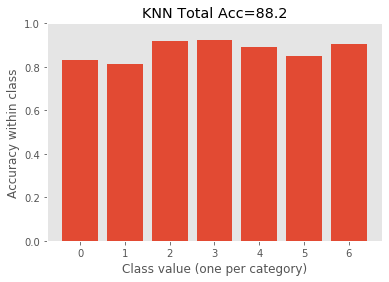

In [0]:
perclasslist = []
totalaccuracy = 0
for trainidx, testidx in cv.split(X,Y2):
    # note that these are sparse matrices
    X_train = X[trainidx] 
    X_test = X[testidx] 
    y_train = Y2[trainidx]
    y_test = Y2[testidx]
    yhat = classifierEstimaterKNN1.predict(X_test)     
    perclassaccuracy = per_class_accuracy(y_test,yhat)
    totalaccuracy += 100*mt.accuracy_score(y_test,yhat)
    perclasslist.append(perclassaccuracy.tolist())
#    print('Per Class Accuracy : {}' .format(perclassaccuracy))

totalaccuracy = totalaccuracy / cv.n_splits

perclassdf = []
perclassdf = pd.DataFrame(perclasslist)
#perclassdf = perclassdf.transpose()
#perclassdf

perclassavg = perclassdf.mean(axis = 0) 
#perclassavg

plt.bar(range(len(perclassavg)), perclassavg)
plt.xlabel('Class value (one per category)')
plt.ylabel('Accuracy within class')
#plt.title(title+", Total Acc=%.1f"%(totalaccuracy))
plt.title("KNN Total Acc=%.1f"%(totalaccuracy))
plt.grid()
plt.ylim([0,1])
plt.show()

In [0]:
Y
ylist = Y['id_label'].values.astype('int64')
ylist
ylist.shape

(39983,)

In [0]:
from sklearn.preprocessing import label_binarize
ybinary = label_binarize(ylist, classes=[1, 2, 3, 4, 5, 6, 7])
n_classes = ybinary.shape[1]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X,ybinary, test_size=0.2) # 70% training and 30% test

In [0]:
%%time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict
# Learn to predict each class against the other
classifier = OneVsRestClassifier(KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance'))
knnbinarymodel = classifier.fit(X_train3, y_train3)
knnbinaryscore = knnbinarymodel.predict(X_test3)
y_score = cross_val_predict(classifier, X, ybinary, cv=10 ,method='predict_proba')

CPU times: user 18.2 s, sys: 28.6 ms, total: 18.3 s
Wall time: 18.3 s


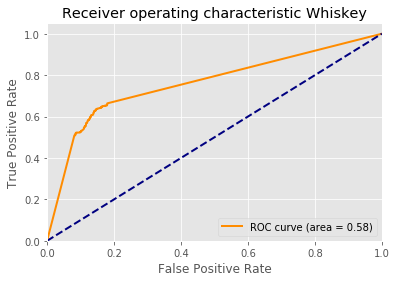

In [0]:
#X1_train, X1_test, y1_train, y1_test
#y_score = classifier.fit(X_train3, y_train3).decision_function(X_test3)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ybinary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ybinary.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[3])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Whiskey')
plt.legend(loc="lower right")
plt.show()

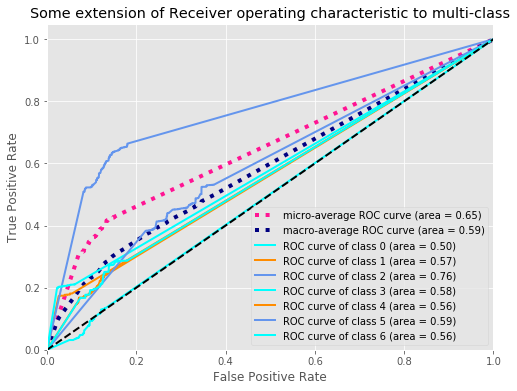

In [0]:
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

#### Model 2: Random Forest Classification

In [0]:
param_grid = [
    {
         'n_estimators': [200, 500], 
         'max_depth': [20,30,35],
         'random_state':[101]
     }
]

clf_RF = RandomForestClassifier()
grid_search_RF = GridSearchCV(clf_RF, param_grid=param_grid, cv=cv,n_jobs=8, verbose=1, scoring='accuracy' )

RandomForest_model1 = grid_search_RF.fit(X1_train_res, y1_train_res)

y_RF_score1 = grid_search_RF.predict(X1_test)


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 15.1min
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed: 24.7min finished


In [0]:
classifierEstimaterRF1 = RandomForest_model1.best_estimator_
classifierEstimaterRF1

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [0]:

print("Precision Score is: {}" .format(precision_score(y1_test, y_RF_score1, average='weighted')))
print("Recall Score is: {}" .format(recall_score(y1_test, y_RF_score1, average='weighted')))
print("F1 Score is: {}" .format(f1_score(y1_test, y_RF_score1, average='weighted')))


Precision Score is: 0.9299054308005282
Recall Score is: 0.9280980367637864
F1 Score is: 0.92862062463523


In [0]:
%%time
EvaluateClassifierEstimator3(classifierEstimaterRF1, X, Y2, cv)


====Iteration 0  ====
accuracy 0.6731682920730182
confusion matrix
 [[ 140    1   12    3   29   35   19]
 [   3  120    1    0    4   44    0]
 [  35   56  682    1   15  114    1]
 [  28    1   71   87   34    8   56]
 [  56   38   24    0  271  123   24]
 [  33    5    8    6   10 1227   22]
 [  50   28  192   11   64   42  165]]
====Iteration 1  ====
accuracy 0.8312078019504876
confusion matrix
 [[ 124    5   73    1    8   24    4]
 [   1  136   18    1    8    8    0]
 [  19   22  843    1    5    5    9]
 [   0    0    0  280    0    5    0]
 [   0    0    2   11  378   94   51]
 [   2    0    0    0   18 1279   12]
 [  37    8   42   28  132   21  284]]
====Iteration 2  ====
accuracy 0.8107026756689172
confusion matrix
 [[ 129    1   60   13   11   21    4]
 [   2   77   26    0   54   10    2]
 [  48    2  819    0    1    3   32]
 [   0    0    0  282    0    3    0]
 [  35   18    5    1  362  102   13]
 [  22    2    0    0   27 1252    8]
 [  90    0    7   97   10   27  3

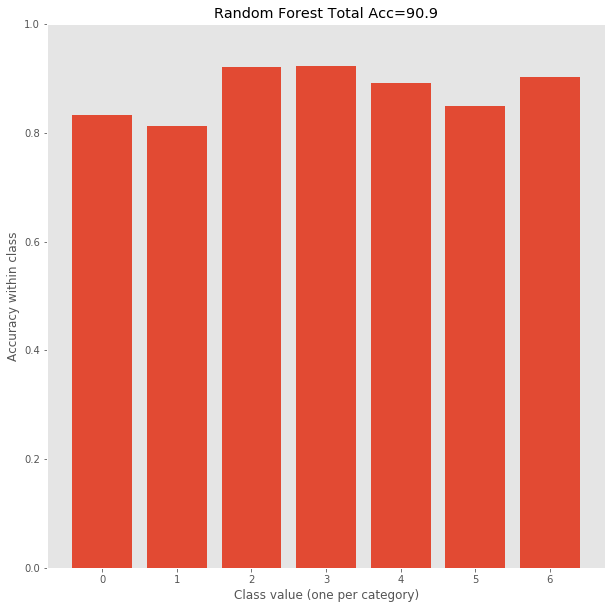

In [0]:
perclasslist = []
totalaccuracy = 0
for trainidx, testidx in cv.split(X,Y2):
    # note that these are sparse matrices
    X_train = X[trainidx] 
    X_test = X[testidx] 
    y_train = Y2[trainidx]
    y_test = Y2[testidx]
    yhat = classifierEstimaterRF1.predict(X_test)       
    perclassaccuracy = per_class_accuracy(y_test,yhat)
    totalaccuracy += 100*mt.accuracy_score(y_test,yhat)
    perclasslist.append(perclassaccuracy.tolist())
#    print('Per Class Accuracy : {}' .format(perclassaccuracy))

totalaccuracy = totalaccuracy / cv.n_splits
RF_acc = totalaccuracy
perclassdf2 = []
perclassdf2 = pd.DataFrame(perclasslist)
#perclassdf = perclassdf.transpose()
#perclassdf

perclassavg2 = perclassdf2.mean(axis = 0) 
#perclassavg

plt.bar(range(len(perclassavg)), perclassavg)
plt.xlabel('Class value (one per category)')
plt.ylabel('Accuracy within class')
#plt.title(title+", Total Acc=%.1f"%(totalaccuracy))
plt.title("Random Forest Total Acc=%.1f"%(totalaccuracy))
plt.grid()
plt.ylim([0,1])
plt.show()

In [0]:
ylist = Y['id_label'].values.astype('int64')
ylist
ylist.shape

(39983,)

In [0]:
from sklearn.preprocessing import label_binarize
ybinary = label_binarize(ylist, classes=[1, 2, 3, 4, 5, 6, 7])
n_classes = ybinary.shape[1]

X_train4, X_test4, y_train4, y_test4 = train_test_split(X,ybinary, test_size=0.2) # 70% training and 30% test

In [0]:
%%time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict
# Learn to predict each class against the other
rfclassifiercv = OneVsRestClassifier(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False))
rfbinarymodel = rfclassifiercv.fit(X_train4, y_train4)
rfbinaryscore = rfclassifiercv.predict(X_test4)
y_score = cross_val_predict(rfclassifiercv, X, ybinary, cv=10 ,method='predict_proba')

CPU times: user 20min 35s, sys: 5.09 s, total: 20min 41s
Wall time: 20min 48s


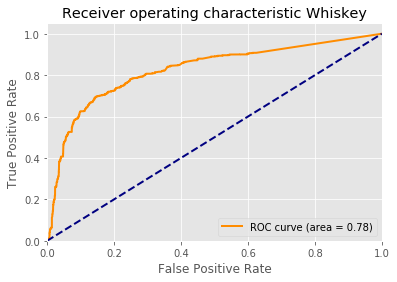

In [0]:
#X1_train, X1_test, y1_train, y1_test
#y_score = classifier.fit(X_train3, y_train3).decision_function(X_test3)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ybinary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ybinary.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[3])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Whiskey')
plt.legend(loc="lower right")
plt.show()

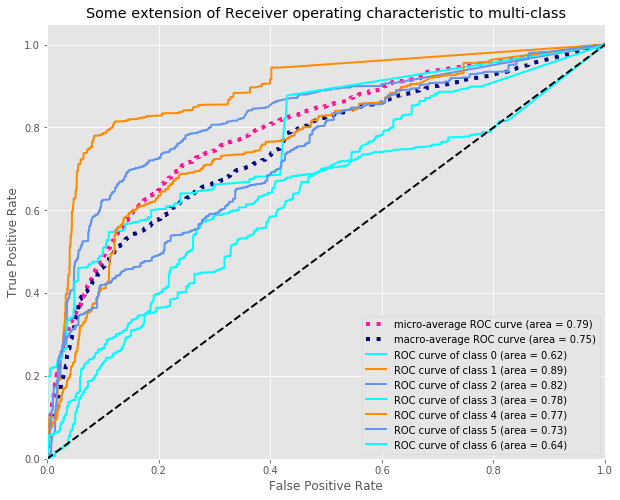

In [0]:
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

#### Model 3: Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

parameters = { 'penalty':['l2']
              ,'C': [0.1, 1, 10, 100]
              ,'class_weight': ['balanced','none']
              ,'solver': ['lbfgs']
              ,'max_iter':[1500,2000]
              ,'random_state':[101]
             }

clf_LR = LogisticRegression()
grid_search_LR = GridSearchCV(clf_LR, param_grid=parameters, cv=cv,n_jobs=8, verbose=1, scoring='accuracy' )

LogisticRegression_model = grid_search_LR.fit(X1_train_res, y1_train_res)

y_LR_score = grid_search_LR.predict(X1_test)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 160 out of 160 | elapsed: 26.1min finished


In [0]:
classifierEstimaterLR = LogisticRegression_model.best_estimator_
classifierEstimaterLR

LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=2000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Score is: {}" .format(precision_score(y1_test, y_LR_score, average='weighted')))
print("Recall Score is: {}" .format(recall_score(y1_test, y_LR_score, average='weighted')))
print("F1 Score is: {}" .format(f1_score(y1_test, y_LR_score, average='weighted')))


Precision Score is: 0.46045007322887543
Recall Score is: 0.32537201450543957
F1 Score is: 0.3404978440998716


In [0]:
EvaluateClassifierEstimator3(classifierEstimaterLR, X, Y2, cv)


====Iteration 0  ====
accuracy 0.32733183295823953
confusion matrix
 [[108   1  27  28   6  62   7]
 [ 15 102  39   0  16   0   0]
 [214  54 578   4   7  45   2]
 [ 35   3  58  97  12  28  52]
 [ 61 176   3 126  53  44  73]
 [329  13   6 323  35 308 297]
 [140  55  88  96  94  16  63]]
====Iteration 1  ====
accuracy 0.3663415853963491
confusion matrix
 [[ 67  19  73  17   9  15  39]
 [  8 118  27   3  15   1   0]
 [ 87  94 716   3   3   0   1]
 [  0  12   0 115  64   1  93]
 [ 10 130   2 186  13 180  15]
 [270   8   0 472  25 318 218]
 [ 31  30  11 313  42   7 118]]
====Iteration 2  ====
accuracy 0.20930232558139536
confusion matrix
 [[  67   23   90   16    0   24   19]
 [   7  134   14    5    0    0   11]
 [ 458   15  429    0    1    0    2]
 [   0   79    0  118   36    0   52]
 [  53  148    7  109   10   80  129]
 [ 135   39    0 1004    7   37   89]
 [   0    7    0  495    6    2   42]]
====Iteration 3  ====
accuracy 0.17083541770885444
confusion matrix
 [[  81   19   61    1 

In [0]:
from sklearn.model_selection import cross_val_score
LR_accuracy = cross_val_score(classifierEstimaterLR, X, y=Y2, cv=cv)
LR_acc=LR_accuracy.mean()
print('Average LR accuracy score is : {}' .format(LR_acc))

Average LR accuracy score is : 0.2722635573850941


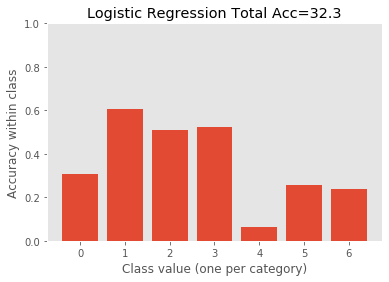

In [0]:
perclasslist = []
totalaccuracy = 0
for trainidx, testidx in cv.split(X,Y2):
    # note that these are sparse matrices
    X_train = X[trainidx] 
    X_test = X[testidx] 
    y_train = Y2[trainidx]
    y_test = Y2[testidx]
    yhat = classifierEstimaterLR.predict(X_test)       
    perclassaccuracy = per_class_accuracy(y_test,yhat)
    totalaccuracy += 100*mt.accuracy_score(y_test,yhat)
    perclasslist.append(perclassaccuracy.tolist())
#    print('Per Class Accuracy : {}' .format(perclassaccuracy))

totalaccuracy = totalaccuracy / cv.n_splits

perclassdf3 = []
perclassdf3 = pd.DataFrame(perclasslist)
#perclassdf = perclassdf.transpose()
#perclassdf

perclassavg3 = perclassdf2.mean(axis = 0) 
#perclassavg

plt.bar(range(len(perclassavg3)), perclassavg3)
plt.xlabel('Class value (one per category)')
plt.ylabel('Accuracy within class')
#plt.title(title+", Total Acc=%.1f"%(totalaccuracy))
plt.title("Logistic Regression Total Acc=%.1f"%(totalaccuracy))
plt.grid()
plt.ylim([0,1])
plt.show()

In [0]:
from sklearn.preprocessing import label_binarize
ybinary = label_binarize(ylist, classes=[1, 2, 3, 4, 5, 6, 7])
n_classes = ybinary.shape[1]

X_train5, X_test5, y_train5, y_test5 = train_test_split(X,ybinary, test_size=0.2) # 70% training and 30% test

In [0]:
%%time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict
# Learn to predict each class against the other
logclassifiercv = OneVsRestClassifier(classifierEstimaterLR)
logbinarymodel = logclassifiercv.fit(X_train5, y_train5)
logbinaryscore = logclassifiercv.predict(X_test5)
y_score = cross_val_predict(logclassifiercv, X, ybinary, cv=10 ,method='predict_proba')

CPU times: user 25.2 s, sys: 15.6 s, total: 40.8 s
Wall time: 20.6 s


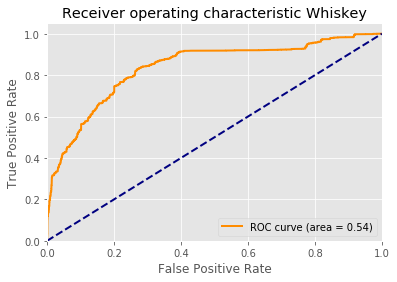

In [0]:
#X1_train, X1_test, y1_train, y1_test
#y_score = classifier.fit(X_train3, y_train3).decision_function(X_test3)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ybinary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ybinary.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[3])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Whiskey')
plt.legend(loc="lower right")
plt.show()

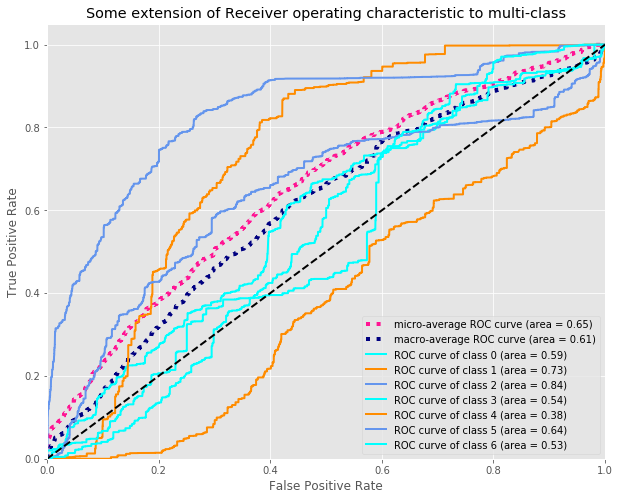

In [0]:
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

#### Final Model chosen

### Task 1 - Modeling and Evaluation 4  
Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.


#Jeff to fill this table out
Model Number|Model Type|Train Time|Accuracy|Recall
M1 | Simple Logistic | 1.1 Seconds | 92.00% | 92.00%
M2 | Logistic Regression Model w/ Gridsearch for Hyperparameter Tuning | 101 seconds | 92.00% | 92.00%
M3 | Linear SVC Model | 297 seconds | 91.82% | 92.00%
M4 | SVM Model w/ Hyperparameter Tuning | 12.4 seconds | 92.30% | 92.00%
M5 | Logistic Regression w/ SGD Optimizer | 0 seconds | 90.70% | 91.00%
M6 | Logistic Regression w/ SGD Optimizer and ParameterGrid for Hyperparameter Tuning | 2.24 seconds | 92.00% | 92.00%
M7 | Linear SVM w/ SGD Optimizer | 0 seconds | 90.20% | 90.00%
```
# This is formatted as code
```


In [0]:
print ('accuracy for KNN classifier is :',KNN_acc)
print ('accuracy for Random Forest classifier is :',RF_acc)
print ('accuracy for Logistic Regression classifier is :',LR_acc)

accuracy for KNN classifier is : 0.5823395818939727
accuracy for Random Forest classifier is : 90.85335553498179
accuracy for Logistic Regression classifier is : 0.2722635573850941


In [0]:
#Add Classifcation report
#add confusion matrix
#add ROC/AUC combined

### Task 1 - Modeling and Evaluation 5  
Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.




#### Statistical Comparisons of Classifiers

In [0]:
from sklearn.model_selection import cross_val_score
acc_KNN_t1 = cross_val_score(classifierEstimaterKNN1, X, y=Y, cv=cv)
acc_RF_t1 = cross_val_score(classifierEstimaterRF1, X, y=Y, cv=cv)
acc_LR_t1 = cross_val_score(classifierEstimaterLR, X, y=Y, cv=cv)

In [0]:
print ('accuracy for KNN classifier is :',acc_KNN_t1)
print ('accuracy for Random Forest classifier is :',acc_RF_t1)
print ('accuracy for Logistic Regression Classifier is :',acc_LR_t1)

accuracy for KNN classifier is : [0.60265066 0.79969992 0.66116529 0.43446723 0.67333667 0.59254627
 0.55827914 0.64057029 0.48149075 0.37918959]
accuracy for Random Forest classifier is : [0.67316829 0.8312078  0.81070268 0.47798899 0.74762381 0.71135568
 0.62931466 0.76213107 0.60455228 0.46798399]
accuracy for Logistic Regression Classifier is : [0.32733183 0.36634159 0.20930233 0.17083542 0.4132066  0.37343672
 0.21485743 0.20735368 0.1935968  0.24637319]


In [0]:
#Is t-value right here???
t = 2.26 / np.sqrt(10)

e_KNN_RF_t1 = (1-acc_KNN_t1)-(1-acc_RF_t1)
e_KNN_LR_t1 = (1-acc_KNN_t1)-(1-acc_LR_t1)
e_RF_LR_t1 = (1-acc_RF_t1)-(1-acc_LR_t1)


stdtot_K_R_t1 = np.std(e_KNN_RF_t1)
stdtot_K_L_t1 = np.std(e_KNN_LR_t1)
stdtot_R_L_t1 = np.std(e_RF_LR_t1)


dbarKR_t1 = np.mean(e_KNN_RF_t1)
dbarKL_t1 = np.mean(e_KNN_LR_t1)
dbarRL_t1 = np.mean(e_RF_LR_t1)


print ('Range of KNN_RF confidence interval:[%0.6f,%0.6f]' % (dbarKR_t1-t*stdtot_K_R_t1,dbarKR_t1+t*stdtot_K_R_t1))
print ('Range of KNN_LR confidence interval:[%0.6f,%0.6f]' % (dbarKL_t1-t*stdtot_K_L_t1,dbarKL_t1+t*stdtot_K_L_t1))
print ('Range of RF_LR confidence interval:[%0.6f,%0.6f]' % (dbarRL_t1-t*stdtot_R_L_t1,dbarRL_t1+t*stdtot_R_L_t1))

Range of KNN_RF confidence interval:[0.063468,0.115059]
Range of KNN_LR confidence interval:[-0.380690,-0.239462]
Range of RF_LR confidence interval:[-0.477818,-0.320861]


***Change this part***. According to the intervals above, the only relationship that is not statistically significant is the relationship between KNN and DT at the 95% level. This is indicated by the fact that the interval range passes through 0 while none of the others do. For the others, this means that they are statistically significant. 

### Task 1 - Modeling and Evaluation 6  
Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.


## Classification 2 (Store Data)

Our second model we will be exploring will be a binary classification of the Hy-vee store which appeared to be the most popular alcohol seller on our list. Before we move forward, we will need to use our one hot encoded dataset wtih store names.

(40000, 12)


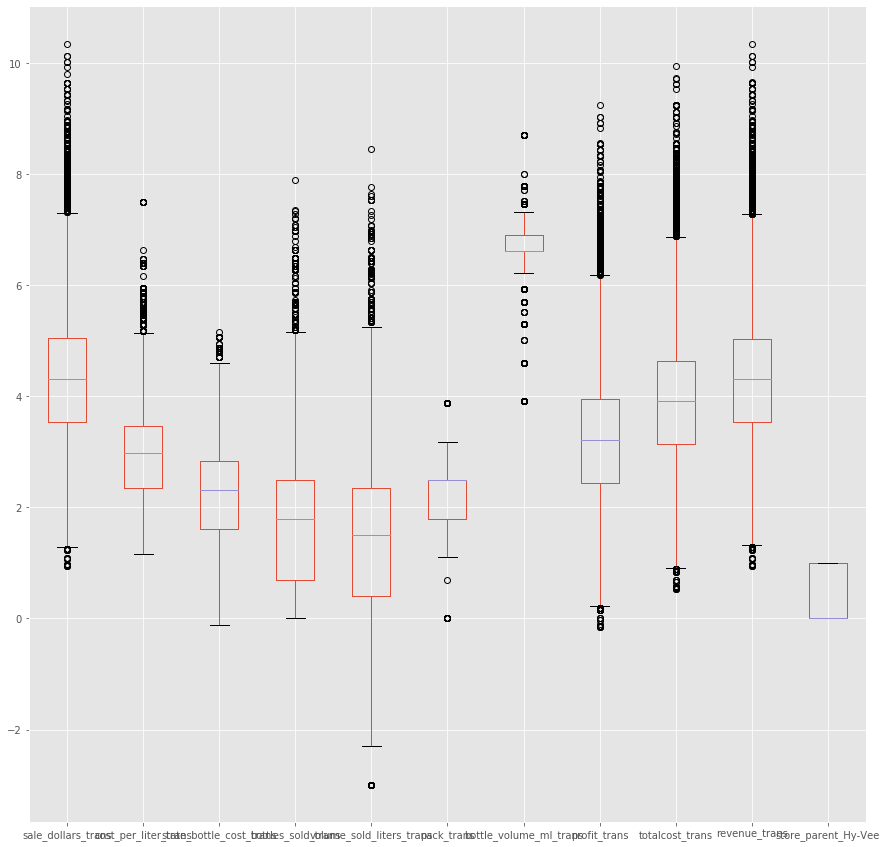

In [15]:
# Since we transformed a number of continuous variables, we can drop them so that we are working directly on our normalized data


# Remove unwanted columns, which include all the specific liquor categories, 
# except for liquor_category_WHISKY since that is what we want to classify on, along
# with all the store_ attributes
"""
cat_vars=['counter', 'liquor_category', 'store_parent',
 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 
 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 
 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 
 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 
 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 
 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
"""
#keep our transformed detail, along with the timing and store name detail

to_keep=['sale_dollars_trans', 'cost_per_liter_trans', 
      'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans','pack_trans', 'bottle_volume_ml_trans', 
       'profit_trans', 'totalcost_trans', 'revenue_trans', 'id_label', 'store_parent_Hy-Vee']
data_final2=data[to_keep]
data_final2.columns.values

#boxplot of all the variables
plt.figure(figsize=(15, 15))
ax = data_final2.boxplot()
#ax.set_yscale('log')

print(data_final2.shape)

In [16]:
#cholesterol percentage split
(data_final2['store_parent_Hy-Vee'].value_counts()/len(data_final2))*100

0    60.905
1    39.095
Name: store_parent_Hy-Vee, dtype: float64

For our data training set, we will use a stratified k-fold cross validation method which will help to balance the ratio of labels used without having to run a SMOTE which was done previously. Our store_parent_Hy-Vee variable has roughly a 60 - 40% split, and with a data set of 40k, we will have a high enough level of confidence of a random split with the stratefied techniques. This method will cycle 10 tiems around so that all of the data can be used as a hold out as well as a training data set. 

Like previously, we will use the SMOTE technique to generate new samples to help balance the instances from Hy-Vee with the instances that were not from Hy-Vee and avoid overfitting. 

For this task, we will use accuracy as a key metric to evvaluate the models which are KNN, SVM and Random Forest.

### Task 2 Data Preparation


In [18]:

from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt
cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=101)
#separating input data into two parts X (features) and Y (target)
features2 = ['sale_dollars_trans', 'cost_per_liter_trans', 
       'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans', 'pack_trans', 'bottle_volume_ml_trans',
       'profit_trans', 'totalcost_trans', 'revenue_trans']

Xt2 = data_final2[features2].copy()

scaler = StandardScaler()
scaler.fit(Xt2)

#This makes our model's coefficients take on the same scale for accurate feature importance analysis
#Notice we scaled the data before the cross validation
Xt = scaler.transform(Xt2)

Yt2= data_final2[['store_parent_Hy-Vee']].copy()
Yt2.shape

(40000, 1)

### Task 2 - Modeling and Evaluation 3
Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!

We tried 3 different algorithms to create a model which has superior prediction capabilities based on the ROC/AUC scoring parameter:

*   Support Vector Machine
*   Random Forest Classification
*   Decision Tree Classifier

A ROC/AUC plot will be created for each model and summarized our findings based on the combined results for these different models.

#### Model 1: Support vector Machine

In [20]:

#SVM_SGD 10-fold cross-validation 

param_grid = { 'loss': ['modified_huber']
              ,'penalty':['l2']
              ,'alpha': [0.01, 0.1, 1, 10]
              ,'class_weight': ['balanced', None]
              ,'random_state': [101]
              ,'max_iter':[1000,1500]
              
             }
clf_SVM_t2 = SGDClassifier()
#Create a grid search object using the above parameters 
from sklearn.model_selection import GridSearchCV
SVMGridSearch_t2 = GridSearchCV(clf_SVM_t2, param_grid=param_grid, cv=cv,n_jobs=8, verbose=1, scoring='roc_auc' )

#Perform hyperparameter search to find the best combination of parameters for our data
SVMGridSearch_t2.fit(Xt,y=Yt2.values.ravel())
y_SVM_score_t2 = SVMGridSearch_t2.predict(Xt)

y_SVM_prob_t2=SVMGridSearch_t2.predict_proba(Xt)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 160 out of 160 | elapsed:    8.9s finished


In [24]:
classifierEstimaterSVM_t2 =SVMGridSearch_t2.best_estimator_
classifierEstimaterSVM_t2

SGDClassifier(alpha=1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='modified_huber', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=101, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
def EvaluateClassifierEstimator_t2(classifierEstimator, X, Y, cv):



#Perform cross validation 
    scores = cross_validate(classifierEstimator, X, Y,
                            scoring=['accuracy', 'precision','recall'], 
                            cv=cv, return_train_score=True, 
                            )

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Rreavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average Recall for all cv folds is: \t\t\t {Rreavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Rreavg=Rreavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']
    print(scoresResults)
    return scoresResults

SVM_scores_t2 = EvaluateClassifierEstimator_t2(classifierEstimaterSVM_t2,Xt,Yt2,cv)


The average accuracy for all cv folds is: 			 0.60845
The average precision for all cv folds is: 			 0.23687
The average Recall for all cv folds is: 			 0.0010873
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0   0.60700   0.090909  0.000640
1   0.60925   0.500000  0.005118
2   0.60900   0.000000  0.000000
3   0.60900   0.500000  0.000639
4   0.60675   0.000000  0.000000
5   0.60700   0.277778  0.003197
6   0.60900   0.000000  0.000000
7   0.60900   0.000000  0.000000
8   0.60950   1.000000  0.001279
9   0.60900   0.000000  0.000000


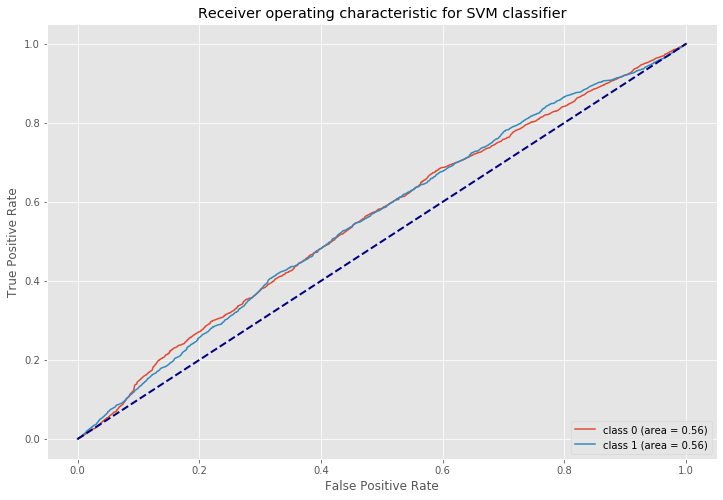

In [28]:
from sklearn.metrics import roc_curve, auc
fprSVM_t2 = dict()
tprSVM_t2 = dict()
roc_auc_SVM_t2 = dict()
for i in np.unique(Yt2):
    fprSVM_t2[i], tprSVM_t2[i], _ = mt.roc_curve(Yt2, y_SVM_prob_t2[:,i], pos_label=i)
    roc_auc_SVM_t2[i] = mt.auc(fprSVM_t2[i], tprSVM_t2[i])
plt.figure(figsize=(12,8));    
for i in np.unique(Yt2):
    plt.plot(fprSVM_t2[i], tprSVM_t2[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_SVM_t2[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for SVM classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [29]:
EvaluateClassifierEstimator2(classifierEstimaterSVM_t2, Xt, Yt2, cv)


              precision    recall  f1-score   support

           0       0.61      1.00      0.76     24362
           1       0.29      0.00      0.00     15638

    accuracy                           0.61     40000
   macro avg       0.45      0.50      0.38     40000
weighted avg       0.49      0.61      0.46     40000

[[24321    41]
 [15621    17]]
0.60845


#### Model 2 KNN Classification with Grid Search

In [30]:
param_grid = [
    {
         'weights': ['uniform','distance'],
         'leaf_size': [10,30],
         'metric': ['minkowski','euclidean'],
         'n_neighbors':[13,15,17],
         
    }
]
clf_KNN_t2 = KNeighborsClassifier()
grid_search_KNN_t2 = GridSearchCV(clf_KNN_t2, param_grid=param_grid,cv=cv,n_jobs=8, verbose=1, scoring='roc_auc' )

KNearest_model_t2 = grid_search_KNN_t2.fit(Xt, Yt2.values.ravel())
y_KNN_score_t2 = grid_search_KNN_t2.predict(Xt)

y_KNN_prob_t2=grid_search_KNN_t2.predict_proba(Xt)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   38.5s
[Parallel(n_jobs=8)]: Done 240 out of 240 | elapsed:   48.9s finished


In [31]:
classifierEstimaterKNN_t2 = KNearest_model_t2.best_estimator_
classifierEstimaterKNN_t2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')


The GridSearch algorithm determined the following optimal parameters for K-Neighbors model.

Leaf-Size: 10
Number of Neighbors: 17

Distance Matric: Minkowski

Weights: Distance

In [32]:
KNearest_scores_t2 = EvaluateClassifierEstimator(classifierEstimaterKNN_t2,Xt,Yt2,cv=cv)


The average accuracy for all cv folds is: 			 0.43275
The average precision for all cv folds is: 			 0.30262
The average Recall for all cv folds is: 			 0.33017
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0   0.54125   0.401163  0.353167
1   0.42175   0.341371  0.516315
2   0.42075   0.303394  0.371483
3   0.35000   0.246327  0.321611
4   0.36975   0.210526  0.222506
5   0.41250   0.212299  0.185422
6   0.31500   0.239593  0.345908
7   0.46875   0.333729  0.359974
8   0.46425   0.319626  0.328005
9   0.56350   0.418165  0.297315


In [33]:
EvaluateClassifierEstimator2(classifierEstimaterKNN_t2, Xt,Yt2,cv=cv)


              precision    recall  f1-score   support

           0       0.54      0.50      0.52     24362
           1       0.30      0.33      0.31     15638

    accuracy                           0.43     40000
   macro avg       0.42      0.41      0.41     40000
weighted avg       0.44      0.43      0.44     40000

[[12147 12215]
 [10475  5163]]
0.43275


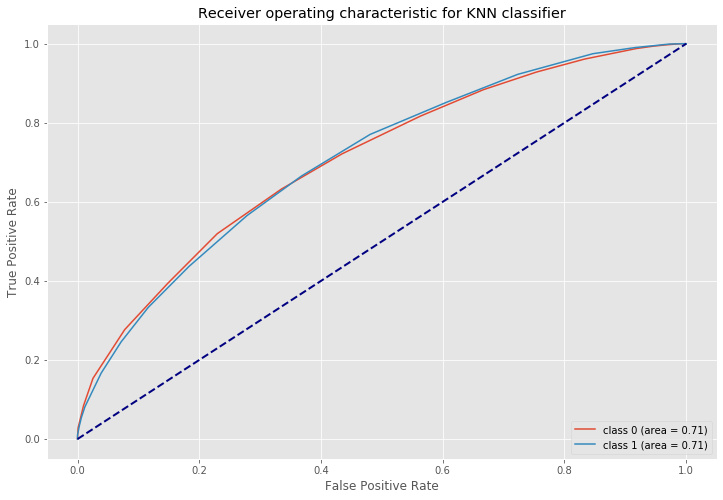

In [34]:

fprKNN_t2 = dict()
tprKNN_t2 = dict()
roc_auc_KNN_t2 = dict()
for i in np.unique(Yt2):
    fprKNN_t2[i], tprKNN_t2[i], _ = mt.roc_curve(Yt2, y_KNN_prob_t2[:, i], pos_label=i)
    roc_auc_KNN_t2[i] = mt.auc(fprKNN_t2[i], tprKNN_t2[i])
plt.figure(figsize=(12,8));    
for i in np.unique(Yt2):
    plt.plot(fprKNN_t2[i], tprKNN_t2[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_KNN_t2[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for KNN classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Model 3 Random Forest

In [36]:
param_grid = [
    {
         'n_estimators': [200, 500], 
         'max_depth': [5,10,15],
         'random_state':[101]
     }
]

clf_RF_t2 = RandomForestClassifier()
grid_search_RF_t2 = GridSearchCV(clf_RF_t2, param_grid=param_grid, cv=cv,n_jobs=8, verbose=1, scoring='roc_auc' )

RandomForest_model_t2 = grid_search_RF_t2.fit(Xt, Yt2.values.ravel())

y_RF_score_t2 = grid_search_RF_t2.predict(Xt)
y_RF_prob_t2=grid_search_RF_t2.predict_proba(Xt)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  5.0min
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:  9.7min finished


In [37]:
classifierEstimaterRF_t2 = RandomForest_model_t2.best_estimator_
classifierEstimaterRF_t2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [38]:
Random_Forest_scores_t2 = EvaluateClassifierEstimator(classifierEstimaterRF_t2,Xt,Yt2,cv=cv)


The average accuracy for all cv folds is: 			 0.565
The average precision for all cv folds is: 			 0.31855
The average Recall for all cv folds is: 			 0.1024
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0   0.59000   0.380062  0.078055
1   0.50050   0.377049  0.426743
2   0.53725   0.292929  0.129795
3   0.60475   0.206897  0.003836
4   0.58925   0.012346  0.000639
5   0.59150   0.111111  0.006394
6   0.42050   0.123752  0.079284
7   0.59500   0.452381  0.170077
8   0.61100   0.722222  0.008312
9   0.61025   0.506702  0.120844


In [39]:
EvaluateClassifierEstimator2(classifierEstimaterRF_t2,Xt,Yt2,cv=cv)


              precision    recall  f1-score   support

           0       0.60      0.86      0.71     24362
           1       0.32      0.10      0.16     15638

    accuracy                           0.56     40000
   macro avg       0.46      0.48      0.43     40000
weighted avg       0.49      0.56      0.49     40000

[[20999  3363]
 [14037  1601]]
0.565


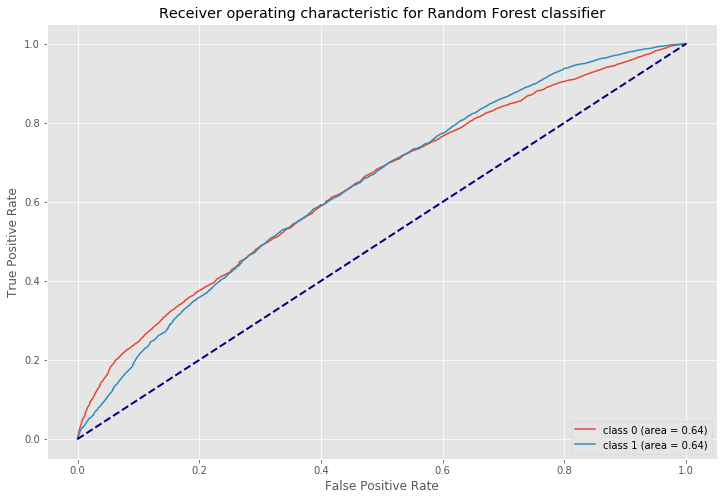

In [40]:
# create ROC cuve for Random Forest model:
fprRF_t2 = dict()
tprRF_t2 = dict()
roc_auc_RF_t2 = dict()
for i in np.unique(Yt2):
    fprRF_t2[i], tprRF_t2[i], _ = mt.roc_curve(Yt2, y_RF_prob_t2[:, i], pos_label=i)
    roc_auc_RF_t2[i] = mt.auc(fprRF_t2[i], tprRF_t2[i])
plt.figure(figsize=(12,8));    
for i in np.unique(Yt2):
    plt.plot(fprRF_t2[i], tprRF_t2[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_RF_t2[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for Random Forest classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Model 4 Decision Tree Classifier

In [41]:
param_grid = [
    {
         'max_depth': [5,10],
         'random_state':[101] 
     }
]

clf_DT_t2 = DecisionTreeClassifier()


grid_searchDT_t2 = GridSearchCV(clf_DT_t2, param_grid=param_grid, cv=cv,n_jobs=-1, verbose=1, scoring='roc_auc')


# # Here we are training the model, this is 
# # what takes the most amount of time to run
DT_model_t2 = grid_searchDT_t2.fit(Xt, Yt2.values.ravel())

y_DT_score_t2 = grid_searchDT_t2.predict(Xt)
y_DT_prob_t2 = grid_searchDT_t2.predict_proba(Xt)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.9s finished


In [42]:
classifierEstimaterDT_t2 = DT_model_t2.best_estimator_
classifierEstimaterDT_t2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [43]:
DT_scores_t2 = EvaluateClassifierEstimator(classifierEstimaterDT_t2,Xt,Yt2,cv=10)


The average accuracy for all cv folds is: 			 0.53205
The average precision for all cv folds is: 			 0.35924
The average Recall for all cv folds is: 			 0.23617
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0   0.58825   0.448780  0.235445
1   0.46975   0.344828  0.396673
2   0.54825   0.389243  0.273018
3   0.41950   0.266049  0.275575
4   0.55150   0.155689  0.033248
5   0.54950   0.353448  0.183504
6   0.43975   0.280622  0.276854
7   0.54200   0.366534  0.235294
8   0.60900   0.500000  0.160486
9   0.60300   0.487179  0.291560


In [44]:
EvaluateClassifierEstimator2(classifierEstimaterDT_t2,Xt,Yt2, cv)


              precision    recall  f1-score   support

           0       0.60      0.72      0.65     24362
           1       0.35      0.24      0.28     15638

    accuracy                           0.53     40000
   macro avg       0.47      0.48      0.47     40000
weighted avg       0.50      0.53      0.51     40000

[[17589  6773]
 [11945  3693]]
0.53205


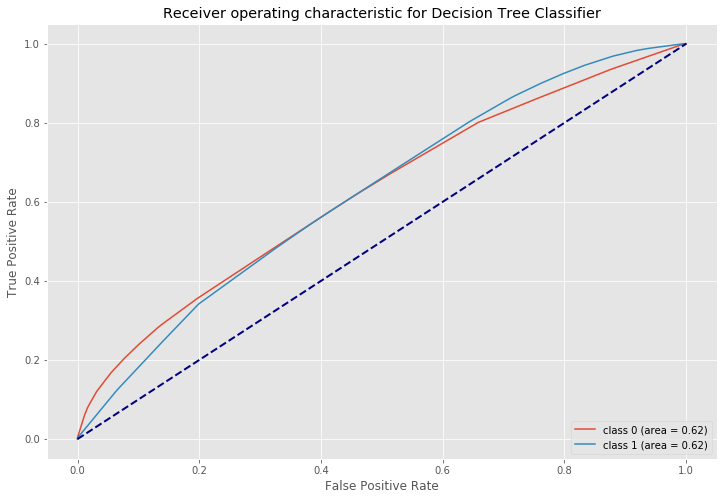

In [45]:
# create ROC curve for  Decision Tree Classifier:
fprDT_t2 = dict()
tprDT_t2 = dict()
roc_auc_DT_t2 = dict()
for i in np.unique(Yt2):
    fprDT_t2[i], tprDT_t2[i], _ = mt.roc_curve(Yt2, y_DT_prob_t2[:, i], pos_label=i)
    roc_auc_DT_t2[i] = mt.auc(fprDT_t2[i], tprDT_t2[i])
plt.figure(figsize=(12,8));    
for i in np.unique(Yt2):
    plt.plot(fprDT_t2[i], tprDT_t2[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_DT_t2[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for Decision Tree Classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Final Model chosen

### Task 2 - Modeling and Evaluation 4  
Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.

Jeff to fill this table out
Model Number|Model Type|Train Time|Accuracy|Recall M1 | Simple Logistic | 1.1 Seconds | 92.00% | 92.00% M2 | Logistic Regression Model w/ Gridsearch for Hyperparameter Tuning | 101 seconds | 92.00% | 92.00% M3 | Linear SVC Model | 297 seconds | 91.82% | 92.00% M4 | SVM Model w/ Hyperparameter Tuning | 12.4 seconds | 92.30% | 92.00% M5 | Logistic Regression w/ SGD Optimizer | 0 seconds | 90.70% | 91.00% M6 | Logistic Regression w/ SGD Optimizer and ParameterGrid for Hyperparameter Tuning | 2.24 seconds | 92.00% | 92.00% M7 | Linear SVM w/ SGD Optimizer | 0 seconds | 90.20% | 90.00%

### Task 2 - Modeling and Evaluation 5  
Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.

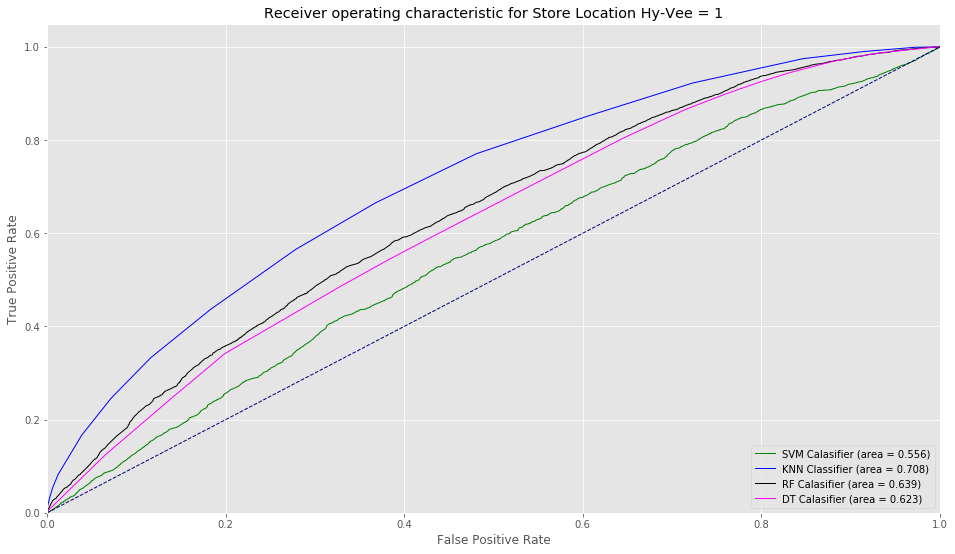

In [46]:
plt.figure(figsize=(16,9));
plt.plot(fprSVM_t2[1], tprSVM_t2[1], color='green', lw=1, label='SVM Calasifier (area = %0.3f)' % roc_auc_SVM_t2[1])
plt.plot(fprKNN_t2[1], tprKNN_t2[1], color='blue', lw=1, label='KNN Classifier (area = %0.3f)' % roc_auc_KNN_t2[1])
plt.plot(fprRF_t2[1], tprRF_t2[1], color='black', lw=1, label='RF Calasifier (area = %0.3f)' % roc_auc_RF_t2[1])
plt.plot(fprDT_t2[1], tprDT_t2[1], color='magenta', lw=1, label='DT Calasifier (area = %0.3f)' % roc_auc_DT_t2[1])
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Store Location Hy-Vee = 1')
plt.legend(loc="lower right")
plt.show()

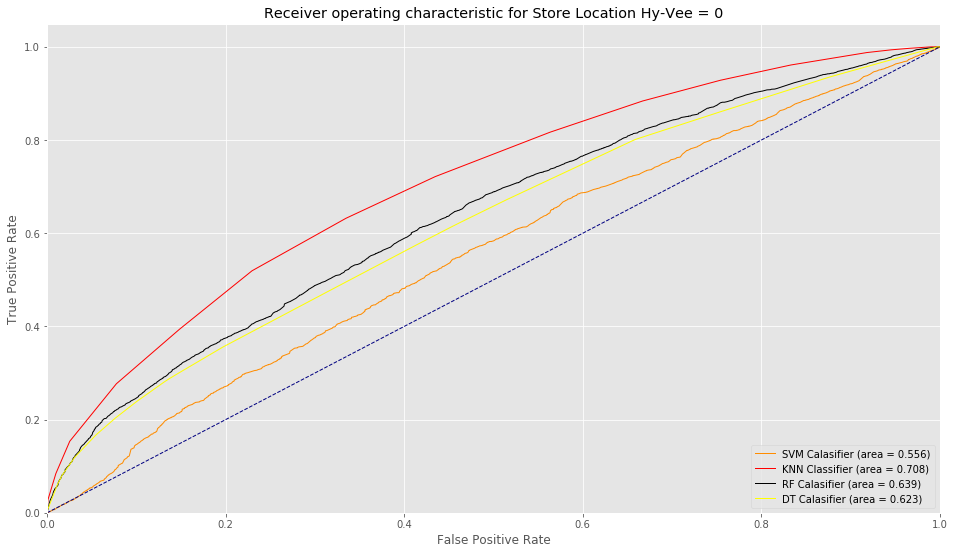

In [47]:
plt.figure(figsize=(16,9));
plt.plot(fprSVM_t2[0], tprSVM_t2[0], color='darkorange', lw=1, label='SVM Calasifier (area = %0.3f)' % roc_auc_SVM_t2[0])
plt.plot(fprKNN_t2[0], tprKNN_t2[0], color='red', lw=1, label='KNN Classifier (area = %0.3f)' % roc_auc_KNN_t2[0])
plt.plot(fprRF_t2[0], tprRF_t2[0], color='black', lw=1, label='RF Calasifier (area = %0.3f)' % roc_auc_RF_t2[0])
plt.plot(fprDT_t2[0], tprDT_t2[0], color='yellow', lw=1, label='DT Calasifier (area = %0.3f)' % roc_auc_DT_t2[0])
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Store Location Hy-Vee = 0')
plt.legend(loc="lower right")
plt.show()

#### Statistical Comparisons of Classifiers

In [0]:
from sklearn.model_selection import cross_val_score

acc_SVM_t2 = cross_val_score(classifierEstimaterSVM_t2, Xt, y=Yt2, cv=cv)
acc_KNN_t2 = cross_val_score(classifierEstimaterKNN_t2, Xt, y=Yt2, cv=cv)
acc_RF_t2 = cross_val_score(classifierEstimaterRF_t2, Xt, y=Yt2, cv=cv)
acc_DT_t2 = cross_val_score(classifierEstimaterDT_t2, Xt, y=Yt2, cv=cv)

In [49]:
print ('accuracy for SVM classifier is :', acc_SVM_t2)
print ('accuracy for KNN classifier is :',acc_KNN_t2)
print ('accuracy for Random Forest classifier is :',acc_RF_t2)
print ('accuracy for Decision Tree Classifier is :',acc_DT_t2)

accuracy for SVM classifier is : [0.607   0.60925 0.609   0.609   0.60675 0.607   0.609   0.609   0.6095
 0.609  ]
accuracy for KNN classifier is : [0.54125 0.42175 0.42075 0.35    0.36975 0.4125  0.315   0.46875 0.46425
 0.5635 ]
accuracy for Random Forest classifier is : [0.59    0.5005  0.53725 0.60475 0.58925 0.5915  0.4205  0.595   0.611
 0.61025]
accuracy for Decision Tree Classifier is : [0.58825 0.46975 0.54825 0.4195  0.5515  0.5495  0.43975 0.542   0.609
 0.603  ]


In [50]:
t = 2.26 / np.sqrt(10)

e_SVM_KNN_t2 = (1-acc_SVM_t2)-(1-acc_KNN_t2)
e_SVM_RF_t2 = (1-acc_SVM_t2)-(1-acc_RF_t2)
e_SVM_DT_t2 = (1-acc_SVM_t2)-(1-acc_DT_t2)
e_KNN_RF_t2 = (1-acc_KNN_t2)-(1-acc_RF_t2)
e_KNN_DT_t2 = (1-acc_KNN_t2)-(1-acc_DT_t2)
e_RF_DT_t2 = (1-acc_RF_t2)-(1-acc_DT_t2)

stdtot_S_K_t2 = np.std(e_SVM_KNN_t2)
stdtot_S_R_t2 = np.std(e_SVM_RF_t2)
stdtot_S_D_t2 = np.std(e_SVM_DT_t2)
stdtot_K_R_t2 = np.std(e_KNN_RF_t2)
stdtot_K_D_t2 = np.std(e_KNN_DT_t2)
stdtot_R_D_t2 = np.std(e_RF_DT_t2)



dbarSK_t2 = np.mean(e_SVM_KNN_t2)
dbarSR_t2 = np.mean(e_SVM_RF_t2)
dbarSD_t2 = np.mean(e_SVM_DT_t2)
dbarKR_t2 = np.mean(e_KNN_RF_t2)
dbarKD_t2 = np.mean(e_KNN_DT_t2)
dbarRD_t2 = np.mean(e_RF_DT_t2)


print ('Range of SVM_KNN confidence interval:[%0.6f,%0.6f]' % (dbarSK_t2-t*stdtot_S_K_t2,dbarSK_t2+t*stdtot_S_K_t2))
print ('Range of SVM_RF confidence interval:[%0.6f,%0.6f]' % (dbarSR_t2-t*stdtot_S_R_t2,dbarSR_t2+t*stdtot_S_R_t2))
print ('Range of SVM_DT confidence interval:[%0.6f,%0.6f]' % (dbarSD_t2-t*stdtot_S_D_t2,dbarSD_t2+t*stdtot_S_D_t2))
print ('Range of KNN_RF confidence interval:[%0.6f,%0.6f]' % (dbarKR_t2-t*stdtot_K_R_t2,dbarKR_t2+t*stdtot_K_R_t2))
print ('Range of KNN_DT confidence interval:[%0.6f,%0.6f]' % (dbarKD_t2-t*stdtot_K_D_t2,dbarKD_t2+t*stdtot_K_D_t2))
print ('Range of RF_DT confidence interval:[%0.6f,%0.6f]' % (dbarRD_t2-t*stdtot_R_D_t2,dbarRD_t2+t*stdtot_R_D_t2))

Range of SVM_KNN confidence interval:[-0.229451,-0.121949]
Range of SVM_RF confidence interval:[-0.085538,-0.001362]
Range of SVM_DT confidence interval:[-0.121922,-0.030878]
Range of KNN_RF confidence interval:[0.085299,0.179201]
Range of KNN_DT confidence interval:[0.065598,0.133002]
Range of RF_DT confidence interval:[-0.072713,0.006813]


According to the intervals above, the only relationship that is not statistically significant is the relationship between KNN and DT at the 95% level. This is indicated by the fact that the interval range passes through 0 while none of the others do. For the others, this means that they are statistically significant. 

In [0]:
#add confusion matrix
#add ROC/AUC combined

### Task 2 - Modeling and Evaluation 6  
Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

In [53]:
# set the parameters of this estimator and fit the model

classifierEstimaterRF_t2.fit(Xt, Yt2.values.ravel())

coef_t2 = classifierEstimaterRF_t2.feature_importances_

X2_t2 = data_final2[features2].copy()

feature_names_t2=list(X2_t2.columns.values)

#Creates a new dataframe with the coefficients and the features 
Top_Features_t2 = pd.DataFrame({'feature_names':feature_names_t2, 'weights':coef_t2})
print("The Top Feature are the following")
display(Top_Features_t2.sort_values(by='weights', ascending=False))

The Top Feature are the following


,feature_names,weights
6,bottle_volume_ml_trans,0.202904
2,state_bottle_cost_trans,0.108552
0,sale_dollars_trans,0.100565
3,bottles_sold_trans,0.098823
5,pack_trans,0.088510
8,totalcost_trans,0.087483
1,cost_per_liter_trans,0.087134
9,revenue_trans,0.082783
4,volume_sold_liters_trans,0.072634
7,profit_trans,0.070613


Text(0.5, 0, 'Coefficient Magnitude\n(z-score)')

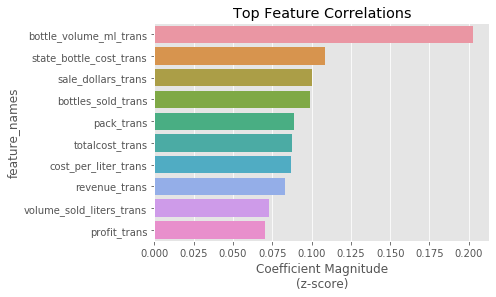

In [54]:
import seaborn as sns
ax = sns.barplot(x =Top_Features_t2['weights'], y = Top_Features_t2.sort_values(by='weights', ascending=False)['feature_names'], 
                 orient= 'h')
ax.set_title("Top Feature Correlations")
ax.set_xlabel("Coefficient Magnitude\n(z-score)")

## Deployment (5 points total)

How useful is your model for interested parties (i.e., the companies or organizations that
might want to use it for prediction)? How would you measure the model's value if it was used
by these parties? How would you deploy your model for interested parties? What other data
should be collected? How often would the model need to be updated, etc.? 

## Exceptional Work (10 points total) 
• You have free reign to provide additional analyses.
• One idea: grid search parameters in a parallelized fashion and visualize the performances
across attributes. Which parameters are most significant for making a good model for each
classification algorithm?

### XGBoost Classifier on THe Store Classifier

In [0]:
__author__ = 'Tilii: https://kaggle.com/tilii7' 

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

Adapted from https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost

Let's run a timer to see how long our model takes to run. 

In [0]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


Set up a parameter grid for the XGBoost that will have an exhaustive exploration in our XG boost model. The total number of combinations we will explore will be 405 X5 to account for the 5 fold cross validation we will use, so 2020 total combinations. 

In [0]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

Next, let's set up our classifier using the API of theXG boost, which is a requirement for the grid search. 

In [0]:
xgb_t2 = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

From here, we wills et up the stratefied folds for our grid search parameters, here will will do 5 folds for 5 param combos. . The param combo declares how many different combinations should be picked out of the 405 we previously discussed. 

In [69]:
folds = 10
param_comb = 5

skf_t2 = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb_t2, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf_t2.split(Xt,Yt2), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
XGB_t2 = random_search.fit(Xt, Yt2.values.ravel())
timer(start_time) # timing ends here for "start_time" variabl

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  9.6min finished



 Time taken: 0 hours 9 minutes and 53.37 seconds.


In [0]:
# # Here we are training the model, this is 
# # what takes the most amount of time to run


y_XGB_score_t2 = random_search.predict(Xt)
y_XGB_prob_t2 = random_search.predict_proba(Xt)

In [71]:
classifierEstimaterXGB_t2 = XGB_t2.best_estimator_
classifierEstimaterXGB_t2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)

After running a grid search on our hyper parameters, the search told us that the optimal tree has a base score of 0.5 with a gbtree booster, which essentialliy is a modified version of decision trees. 

In [72]:
XGB_scores_t2 = EvaluateClassifierEstimator(classifierEstimaterXGB_t2,Xt,Yt2,cv=cv)

The average accuracy for all cv folds is: 			 0.4551
The average precision for all cv folds is: 			 0.30294
The average Recall for all cv folds is: 			 0.25529
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0   0.58800   0.452830  0.261036
1   0.47100   0.370855  0.507997
2   0.41550   0.271547  0.294118
3   0.28525   0.166409  0.206522
4   0.32525   0.204273  0.250639
5   0.40500   0.150685  0.112532
6   0.38125   0.251229  0.294118
7   0.53500   0.383281  0.310742
8   0.54750   0.316964  0.136189
9   0.59725   0.461285  0.179028


In [73]:
EvaluateClassifierEstimator2(classifierEstimaterXGB_t2, Xt,Yt2,cv=10)

              precision    recall  f1-score   support

           0       0.55      0.58      0.57     24362
           1       0.28      0.26      0.27     15638

    accuracy                           0.46     40000
   macro avg       0.42      0.42      0.42     40000
weighted avg       0.45      0.46      0.45     40000

[[14212 10150]
 [11646  3992]]
0.4551


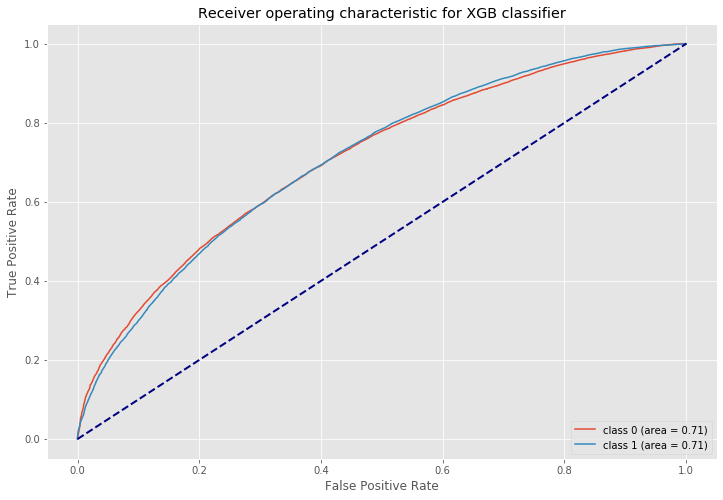

In [74]:
fprXGB_t2 = dict()
tprXGB_t2 = dict()
roc_auc_XGB_t2 = dict()
for i in np.unique(Yt2):
    fprXGB_t2[i], tprXGB_t2[i], _ = mt.roc_curve(Yt2, y_XGB_prob_t2[:, i], pos_label=i)
    roc_auc_XGB_t2[i] = mt.auc(fprXGB_t2[i], tprXGB_t2[i])
plt.figure(figsize=(12,8));    
for i in np.unique(Yt2):
    plt.plot(fprXGB_t2[i], tprXGB_t2[i], label= ('class %d (area = %0.2f)' % (i, roc_auc_XGB_t2[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.title('Receiver operating characteristic for XGB classifier')
plt.legend(loc="lower right")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Exceptional work 2: Voting Ensembles

Adapted from: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html 

Since election season is upon us, it's time for our models to perform their civit duty to best classify the stores we will be exploring. One method of doing so is through a voting ensemble that takes the performance from our previous classifiers to build a wrapped training and testing algorithm or our LR, KNN, DT, RF and XGB Boost model we ran with our location classifier. 

OUr ensemble model will employ the following strategies:
* Majority voting - the class that recieves the largest number of votes will be chosen as the best model. 
* Average Probability: The probability vector for each class is totaled and the mean probability vector is collected, and the winner has the highest value. 


#### Majority Voting

In [77]:

from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

# Training classifiers

#removing SVM because it was overfit
#clf1_t2 = classifierEstimaterSVM_t2

clf2_t2 = classifierEstimaterKNN_t2

clf3_t2 = classifierEstimaterRF_t2

clf4_t2 = classifierEstimaterDT_t2

clf5_t2 = classifierEstimaterXGB_t2

eclf = VotingClassifier(estimators=[('KNN', clf2_t2),
                                    ('RF', clf3_t2),('DT',clf4_t2),('XGB',clf5_t2)],voting='hard',)

labels = ['KNN', 'Random Forest','Decision Tree','XG Boost', 'Ensemble']

for clf, label in zip([ clf2_t2, clf3_t2,clf4_t2,clf5_t2,eclf], labels):

    scores = model_selection.cross_val_score(clf, Xt, Yt2, 
                                              cv=StratifiedKFold(n_splits=10, random_state=101), 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.43 (+/- 0.08) [KNN (k=17)]
Accuracy: 0.56 (+/- 0.06) [Random Forest]
Accuracy: 0.53 (+/- 0.06) [Decision Tree]
Accuracy: 0.46 (+/- 0.10) [XG Boost]
Accuracy: 0.53 (+/- 0.07) [Ensemble]


After running our majority voting model, we were able to pull a majority voting classifier to generate a 53% accuracy using our ensemble. This was based on the combination of the decision tree model that received the most votes among KNN, Rnadom Forest, Decision tree and XG boost. 

#### Average Probability

In [82]:
clf1_1_t2 = SGDClassifier(alpha=0.01, average=False, class_weight='balanced', epsilon=0.1,
                       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
                       learning_rate='optimal', loss='modified_huber', max_iter=1000,
                       n_jobs=1, penalty='l2', power_t=0.5, random_state=101,
                       shuffle=True, tol=None, verbose=0, warm_start=False)

eclf_soft_t2 = VotingClassifier(estimators=[('KNN', clf2_t2),
                                    ('RF', clf3_t2),('DT',clf4_t2),('XGB',clf5_t2)],voting='soft',)

labels = ['KNN', 'Random Forest','Decision Tree','XG Boost', 'Ensemble']

for clf, label in zip([clf2_t2, clf3_t2,clf4_t2,clf5_t2,eclf_soft_t2], labels):

    scores = model_selection.cross_val_score(clf, Xt, Yt2,
                                              cv=StratifiedKFold(n_splits=10, random_state=101), 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.43 (+/- 0.08) [KNN]
Accuracy: 0.56 (+/- 0.06) [Random Forest]
Accuracy: 0.53 (+/- 0.06) [Decision Tree]
Accuracy: 0.46 (+/- 0.10) [XG Boost]
Accuracy: 0.46 (+/- 0.09) [Ensemble]


After running an average probability model, we were able to generate an accuracy score of 0.46 using our Average probability ensemble. this number was generated using the mean probability collected from each class wtih 46% having the highest value. It was not considered our strongest classifier compared to the majority. 

#### Majority Voting Plot

AttributeError: ignored

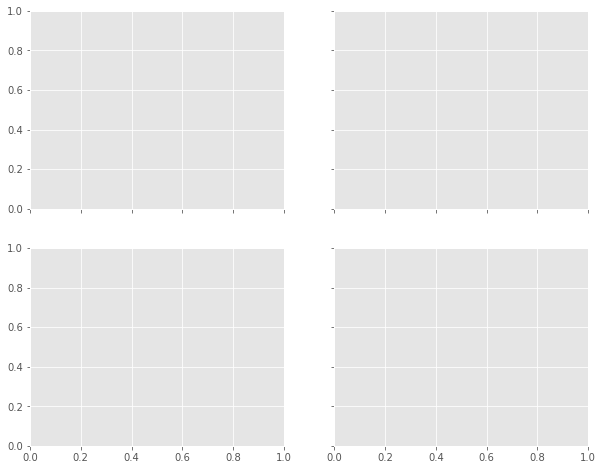

In [89]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Plotting decision regions
x_min, x_max = Xt[:, 0].min() - 1, Xt[:, 0].max() + 1
y_min, y_max = Xt[:, 1].min() - 1, Xt[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf2_t2, clf3_t2,clf4_t2,clf5_t2,eclf],
                        ['KNN', 'Random Forest','Decision Tree','XG Boost', 'Ensemble']):

    Z = eclf
    Z = Z.reshape(Xt)

    axarr[idx[0], idx[1]].contourf(Xt, Yt2, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(Xt[:, 0], Xt[:, 1], c=Yt2,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

#### Exceptional Work 3: Used SMOTE to balance the classifiers 
Adapted from: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html 

For our Task 1 that classified the liquor type, we had an issue of very unbalanced classifiers, with Vodka representing 33% of the total variables, and with Whisky taking up 23% of our liquor types with 7 more variables sharing the remaining 44%. To counteract this, we decided to create a series of synthetic datasets that create an even balance of liquor types. 

Since Schnapps, Amaretto and Brandy make up such low percentages, we dropped them and ran smote on the remaining. What this ended up doing was it created 30k new observations so that each class had just ober 10k observations assigned to it. From here, we ran our classifier models. 